In [1]:
import numpy as np

from matrix_computations_helper import plot_matrices

## Question 1
Suppose $A$ is an $n\times n$ upper triangular matrix, calculate $A^2$ in-place.

In [2]:
def upper_triangular_square(A):
    n = A.shape[0]
    for i in range(0, n):
        for j in range(n - 1, i - 1, -1):
            A[i, j] = A[i, :] @ A[:, j]

n = 1000
A = np.triu(np.random.rand(n, n))
A_squared_correct = A @ A
upper_triangular_square(A)
print(np.allclose(A, A_squared_correct))

True


## Question 2

Suppose $A$ is an $n\times n$ upper Hessenberg matrix and $\lambda_1,\dots,\lambda_r$ are given scalars. Compute the first column of $(A-\lambda_1I)\dots(A-\lambda_rI)$, where $r \ll n$.

In [70]:
def hessenberg_multiply_naive(A, lambdas):
    n, r = A.shape[0], len(lambdas)
    I = np.eye(n, n)
    y = I[:, 0]

    for j in range(r - 1, -1, -1):
        y = (A - lambdas[j] * I) @ y
    
    return y

def hessenberg_multiply(A, lambdas):
    n, r = A.shape[0], len(lambdas)
    I = np.eye(n, n)
    y = I[:, 0]

    for j in range(r):
        x = np.zeros(j + 2)
        for k in range(j + 1):
            for i in range(k + 2):
                if i == k:
                    x[i] = x[i] + (A[i, k] - lambdas[r - j - 1]) * y[k]
                else:
                    x[i] = x[i] + A[i, k] * y[k]
        y[0:j+2] = x

    return y
                    


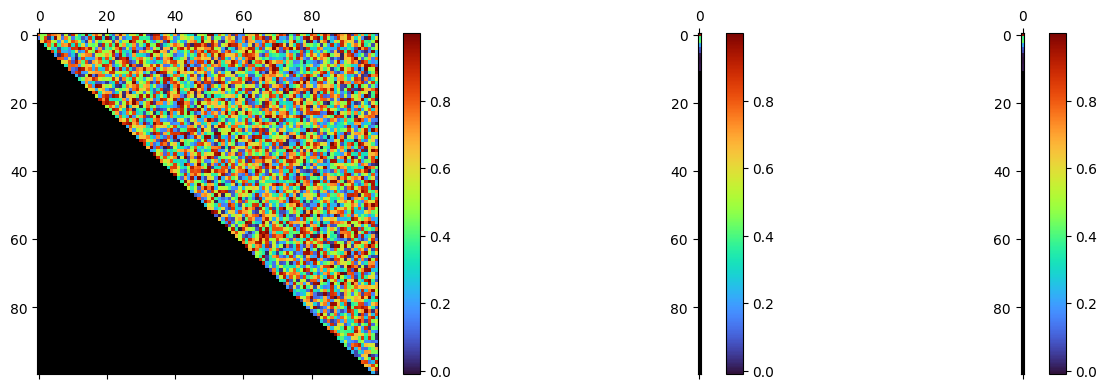

In [ ]:
n = 10
r = 2
A = np.triu(np.random.rand(n, n), -1)
lambdas = np.random.randn(r)

y_correct = hessenberg_multiply_naive(A, lambdas)
y = hessenberg_multiply(A, lambdas)

plot_matrices([A, y_correct[:, np.newaxis], y[:, np.newaxis]], (1, 3), (12, 4))